<a href="https://colab.research.google.com/github/NakulLimbani/Brain_Tumor_Classification/blob/main/Brain__Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dataset**

In [9]:
"""
from google.colab import files
uploaded = files.upload()
"""

'\nfrom google.colab import files\nuploaded = files.upload()\n'

In [10]:
import zipfile

# Replace 'dataset.zip' with the name of your zip file
zip_path = '/content/archive_brain.zip'
extract_path = '/content/dataset/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [11]:
!rm -rf /content/Dataset/

# **Data Cleaning**
- Loop through the dataset and ensure all images are in the correct format.
- Handle any corrupted files and verify the dataset integrity.
- This step prepares the data for further processing and ensures there are no errors.


In [12]:
import os

# Check uploaded files
os.listdir()


['.config',
 '.ipynb_checkpoints',
 'dataset',
 'archive_brain.zip',
 'sample_data']

In [13]:
import os
from PIL import Image

# Set base path to the location where the files are uploaded
base_path = '/content/dataset/archive_brain/Training'
categories = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

for category in categories:
    folder = os.path.join(base_path, category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        try:
            img = Image.open(img_path)
            img.verify()  # Verify image integrity
        except (IOError, SyntaxError) as e:
            print(f"Corrupt image found: {img_path}")


## **Data Preparation**
- Resize the images to a fixed size for uniform input into the model.
- Normalize pixel values to the range [0, 1] by rescaling the images.
- Use ImageDataGenerator to generate batches of augmented images for training and validation.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


# **Data Visualization**
- Create visual representations of the dataset.
- Display sample images from each category to understand the type of images being processed.
- Use a bar chart to show the number of images in each category, helping to identify any imbalances.

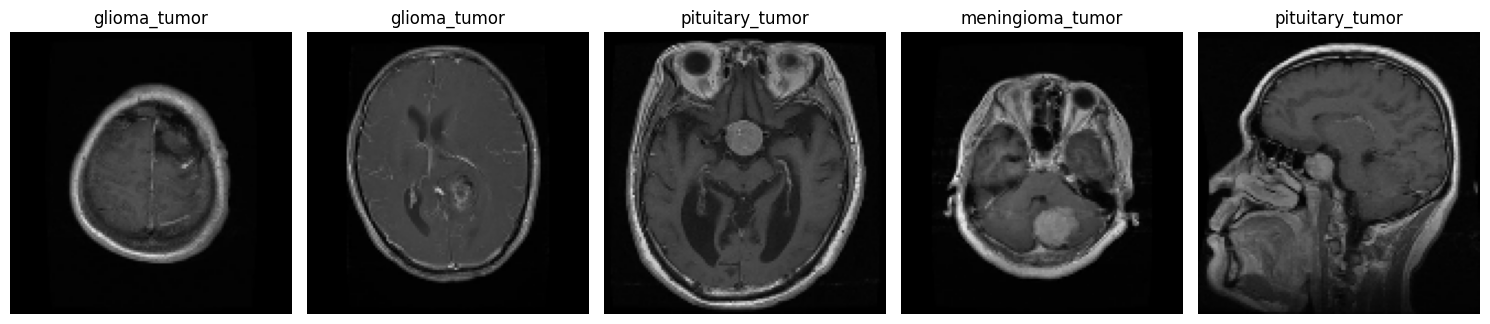

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(generator):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    fig, axes = plt.subplots(1, 5, figsize=(15, 15))
    axes = axes.flatten()
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        idx = np.argmax(label)
        ax.set_title(class_names[idx])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(train_generator)


Displaying sample images for category: no_tumor


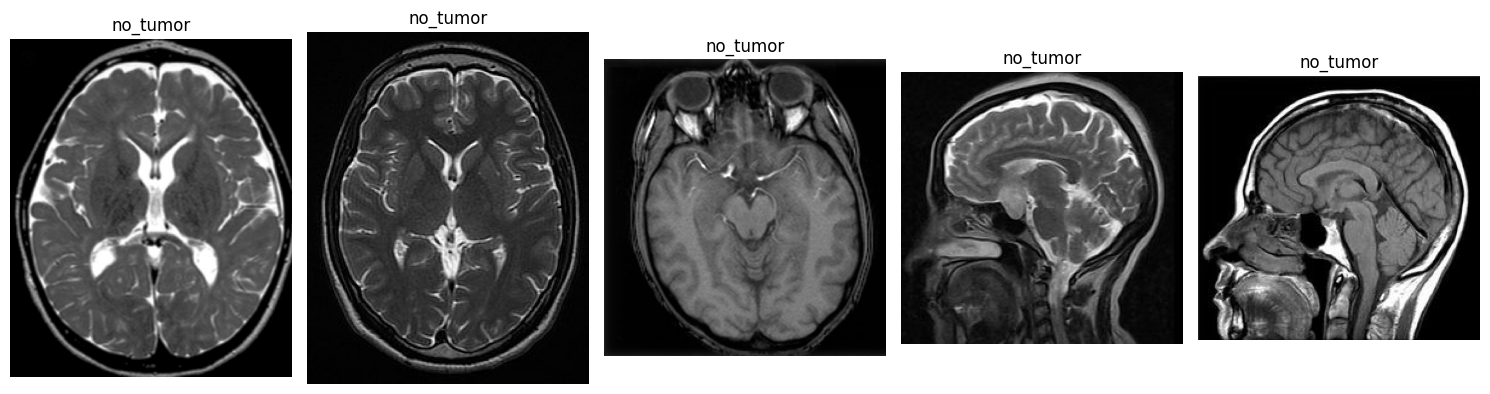

Displaying sample images for category: glioma_tumor


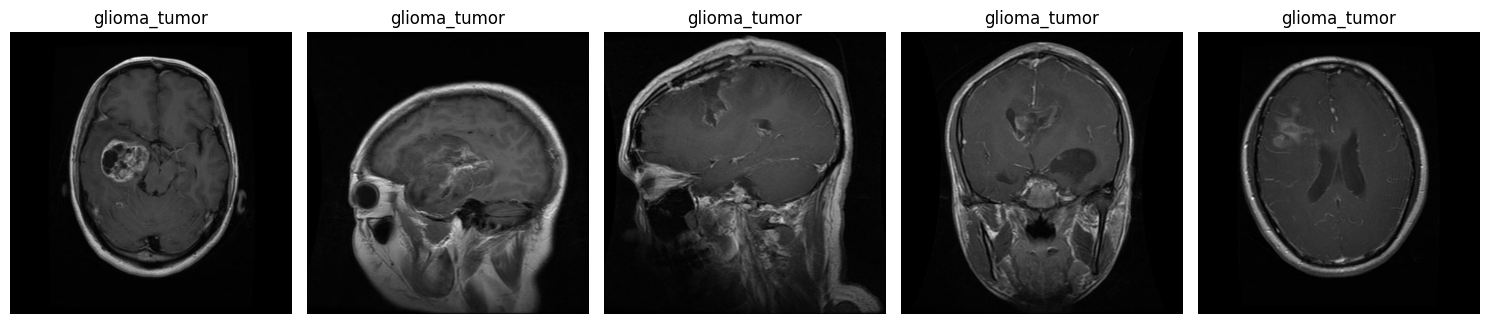

Displaying sample images for category: meningioma_tumor


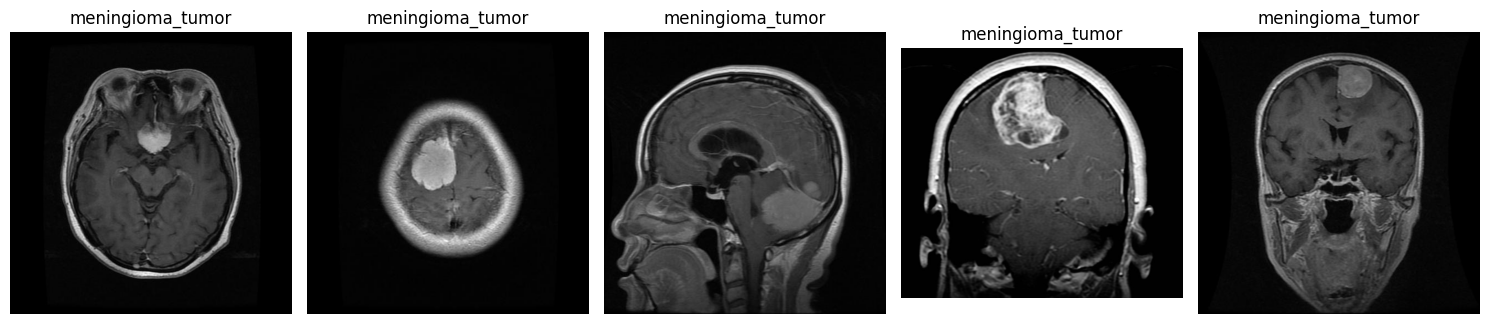

Displaying sample images for category: pituitary_tumor


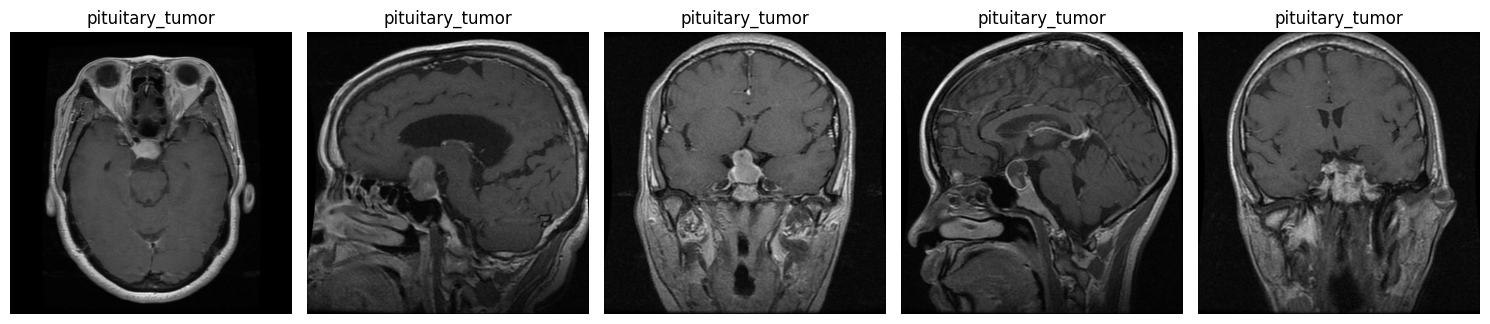

In [24]:
def display_sample_images(folder_path, category_name, num_samples):
    files = os.listdir(folder_path)
    sample_files = np.random.choice(files, num_samples, replace=False)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    axes = axes.flatten()

    for img_path, ax in zip(sample_files, axes):
        img = Image.open(os.path.join(folder_path, img_path))
        ax.imshow(img)
        ax.set_title(category_name)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images from each category
for category in categories:
    folder = os.path.join(base_path, category)
    print(f"Displaying sample images for category: {category}")
    display_sample_images(folder, category, 5)


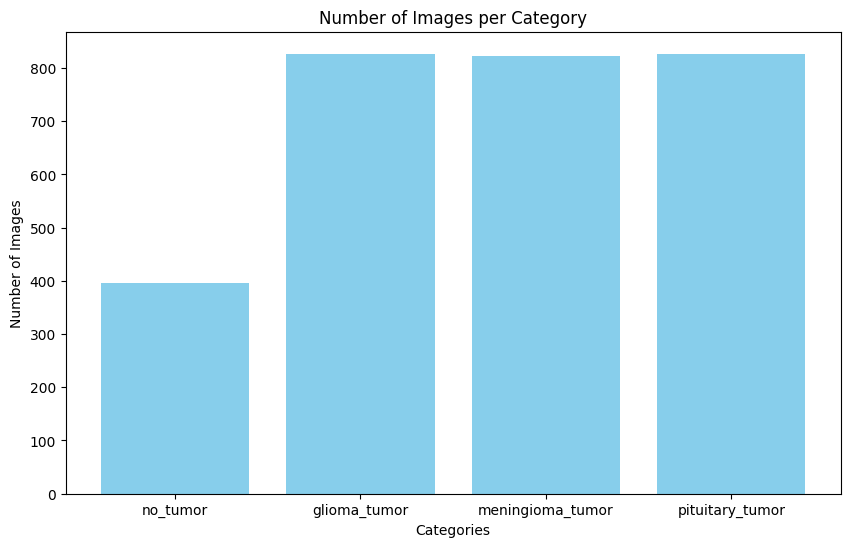

In [28]:
import matplotlib.pyplot as plt
import os

# Base path for the dataset
base_path = '/content/dataset/archive_brain/Training/'

# Categories
categories = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

# Count the number of images in each category
num_images = [len(os.listdir(os.path.join(base_path, category))) for category in categories]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, num_images, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images per Category')
plt.show()
